In [34]:
import pyemma as pm
import mdtraj as md

import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
import os
import pickle
import pandas 

In [62]:
# Paths
md_xtc_path = r'./data/init_paths/CLN_md/md_1us_nopbc.xtc'
md_gro_path = r'./data/init_paths/CLN_md/md_1us.gro'
md_top_path = r'./data/init_paths/CLN_md/topol.top'
model_path = r'./data/CLN/'
init_path = r'./data/init_paths/CLN_md/'

In [11]:
# Read tica_mod and kmeans_mod 

with open(os.path.join(model_path, 'msm_models'), 'rb') as f:
    models = pickle.load(f)
tica_mod = models['tica_mod']
kmeans_mod = models['kmeans_mod']
msm = models['msm']

In [25]:
traj = md.load_xtc(md_xtc_path, md_gro_path)
transition_traj.superpose(transition_traj[0])

traj_no_sol = traj.remove_solvent()

In [44]:
f_traj = md.compute_contacts(traj_no_sol, scheme='ca')[0]
ttraj = tica_mod.transform(f_traj)
straj = kmeans_mod.assign(ttraj)
membership_traj = msm.metastable_memberships[:,0][straj]

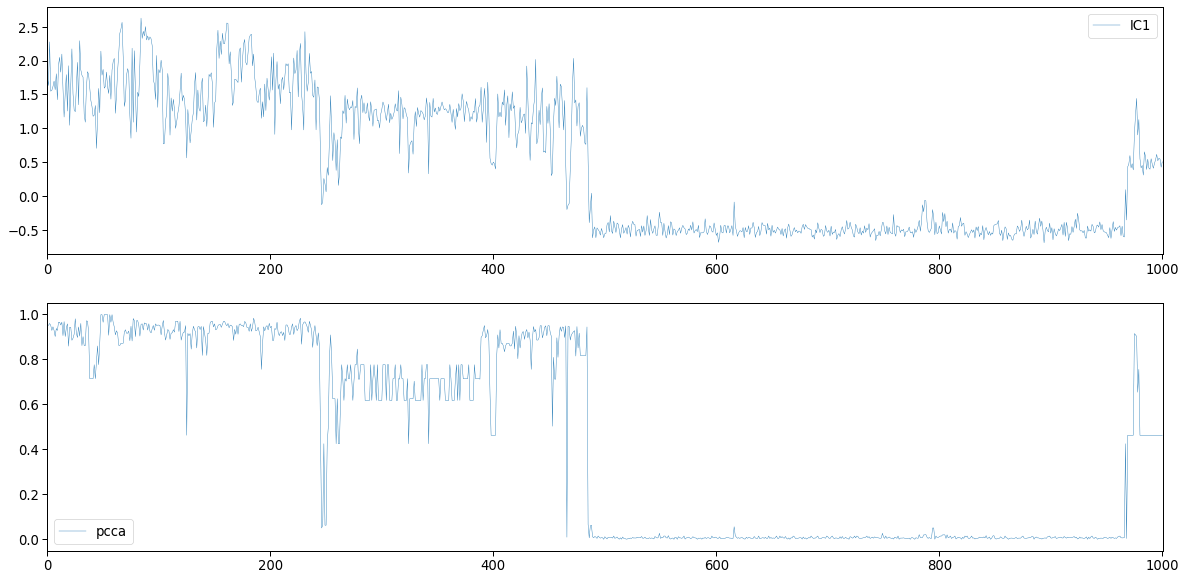

In [59]:
with sns.plotting_context('paper',font_scale=1.5):
    fig, axes = plt.subplots(nrows=2, figsize=(20, 10))
    axes[0].plot(ttraj[:,0], lw=0.4, label='IC1')
    axes[0].set_xlim([0, ttraj.shape[0]])
    axes[1].plot(membership_traj[:], lw=0.4, label='pcca')
    axes[1].set_xlim([0, membership_traj.shape[0]])
    axes[0].legend()
    axes[1].legend()

In [60]:
# Slice transition traj
lb, ub = 430, 530

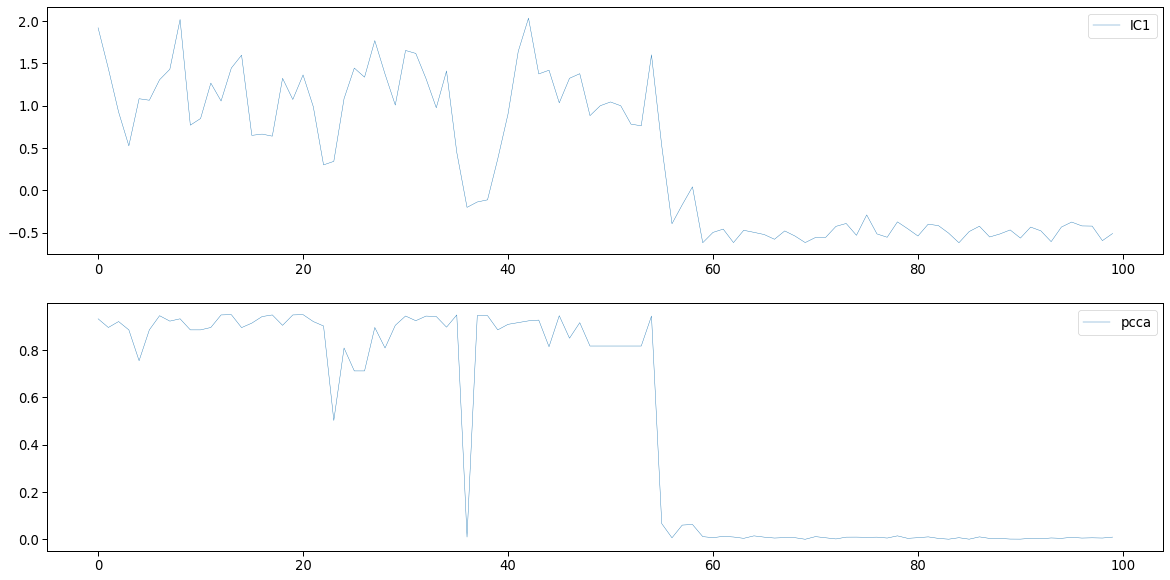

In [61]:
with sns.plotting_context('paper',font_scale=1.5):
    fig, axes = plt.subplots(nrows=2, figsize=(20, 10))
    axes[0].plot(ttraj[lb:ub,0], lw=0.4, label='IC1')
    axes[1].plot(membership_traj[lb:ub], lw=0.4, label='pcca')
    axes[0].legend()
    axes[1].legend()

In [65]:
traj[lb:ub].save(os.path.join(init_path, 'trans.xtc'))
traj_no_sol[lb:ub].save(os.path.join(init_path, 'trans_no_sol.xtc'))